# Summer Olympics Data Analysis Assignment

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
olympics_df = pd.read_csv("summer.csv")

In [236]:
olympics_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [237]:
olympics_df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [302]:
processed_df = olympics_df.dropna()

### 1. In how many cities Summer Olympics is held so far?

In [239]:
len(processed_df['City'].unique())

22

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [282]:
data = []
gp = processed_df.groupby('Sport')
for i in processed_df['Sport'].unique():
    sport = gp.get_group(i)
    data.append([i, (sport['Medal'] == 'Gold').sum()])

In [283]:
pd.DataFrame(data, columns = ['Sport', 'No. of Gold Medals']).sort_values(by = 'No. of Gold Medals', ascending = False).head()

,Sport,No. of Gold Medals
0,Aquatics,1421
1,Athletics,1214
17,Rowing,890
4,Gymnastics,820
3,Fencing,552


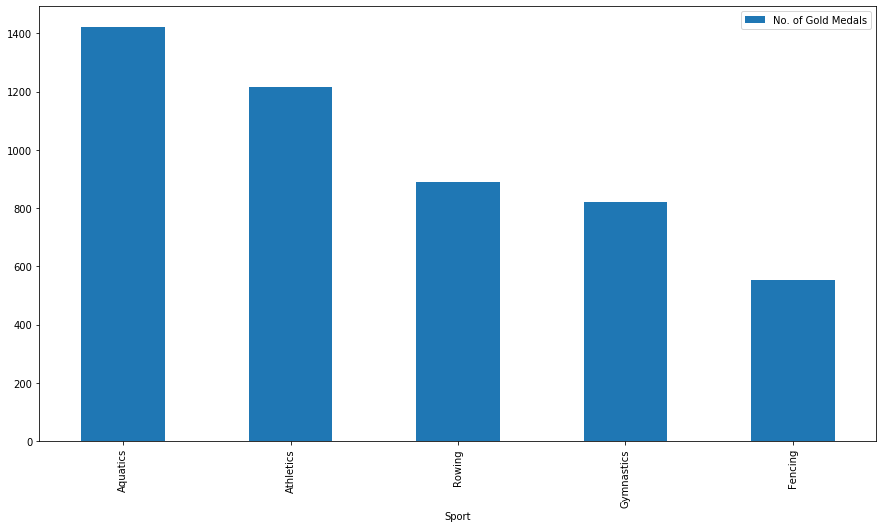

In [284]:
pd.DataFrame(data, columns = ['Sport', 'No. of Gold Medals']).sort_values(by = 'No. of Gold Medals', ascending = False).head().plot(x = 'Sport', y = 'No. of Gold Medals', kind = 'bar', figsize = (15,8))

### 3. Which sport is having most number of medals so far? (Top 5)

In [285]:
data = []
gp = processed_df.groupby('Sport')
for i in processed_df['Sport'].unique():
    sport = gp.get_group(i)
    data.append([i, len(sport['Medal'])])

In [286]:
pd.DataFrame(data, columns = ['Sport', 'Total No. of Medals']).sort_values(by = 'Total No. of Medals', ascending = False).head()

,Sport,Total No. of Medals
0,Aquatics,4170
1,Athletics,3637
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


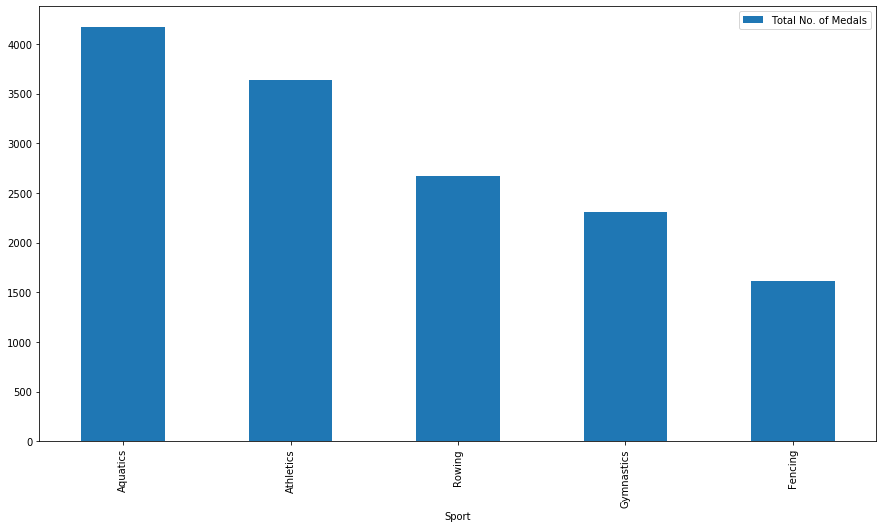

In [287]:
pd.DataFrame(data, columns = ['Sport', 'Total No. of Medals']).sort_values(by = 'Total No. of Medals', ascending = False).head().plot(x = 'Sport', y = 'Total No. of Medals', kind = 'bar', figsize = (15,8))

### 4. Which player has won most number of medals? (Top 5)

In [288]:
data = []
gp = processed_df.groupby('Athlete')
for i in processed_df['Athlete'].unique():
    athlete = gp.get_group(i)
    data.append([i, len(athlete['Medal'])])

In [289]:
pd.DataFrame(data, columns = ['Athlete', 'No. of Medals Won']).sort_values('No. of Medals Won', ascending = False).head()

,Athlete,No. of Medals Won
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
7201,"SHAKHLIN, Boris",13
6591,"ONO, Takashi",13


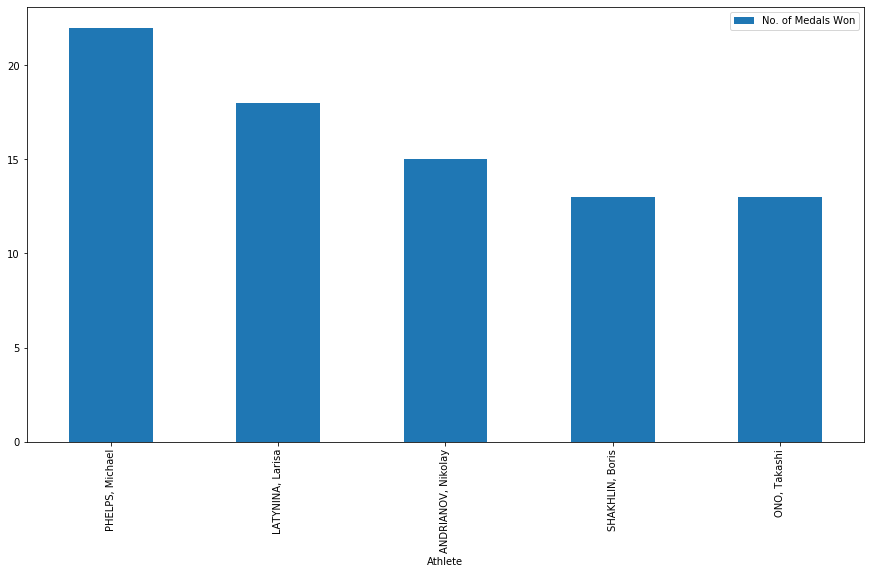

In [290]:
pd.DataFrame(data, columns = ['Athlete', 'No. of Medals Won']).sort_values('No. of Medals Won', ascending = False).head().plot(x = 'Athlete', y = 'No. of Medals Won', kind = 'bar', figsize = (15, 8))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [292]:
data = []
gp = processed_df.groupby('Athlete')
for i in processed_df['Athlete'].unique():
    athlete = gp.get_group(i)
    data.append([i, (athlete['Medal'] == 'Gold').sum()])

In [293]:
pd.DataFrame(data, columns = ['Athlete', 'No. of Gold Medals Won']).sort_values(by = 'No. of Gold Medals Won', ascending = False).head()

,Athlete,No. of Gold Medals Won
18640,"PHELPS, Michael",18
8811,"SPITZ, Mark",9
2262,"NURMI, Paavo",9
12468,"LEWIS, Carl",9
7197,"LATYNINA, Larisa",9


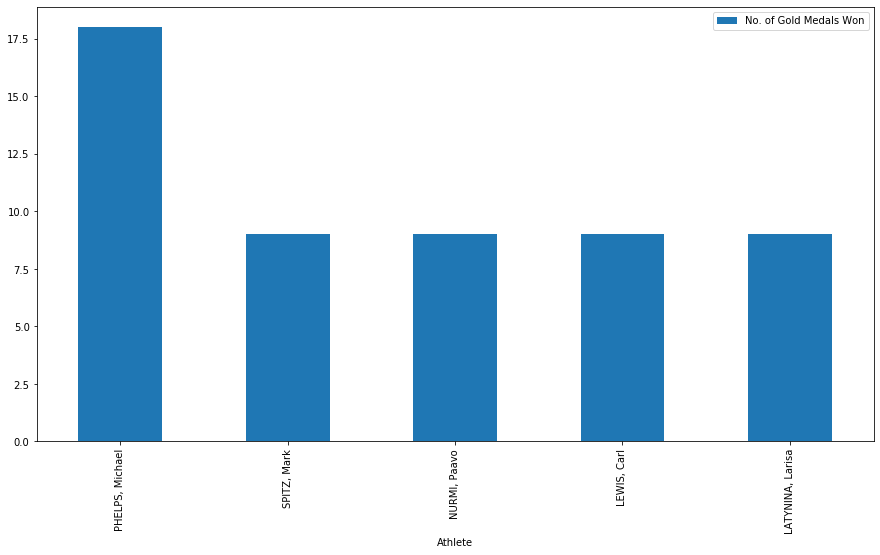

In [294]:
pd.DataFrame(data, columns = ['Athlete', 'No. of Gold Medals Won']).sort_values(by = 'No. of Gold Medals Won', ascending = False).head().plot(x = 'Athlete', y = 'No. of Gold Medals Won', kind = 'bar', figsize = (15, 8))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [295]:
data = []
gp = processed_df.groupby(['Country', 'Medal'])
Country = gp.get_group(('IND', 'Gold'))
Country['Year'].min()

1928

### 7. Which event is most popular in terms on number of players? (Top 5)

In [296]:
data = []
gp = processed_df.groupby('Event')
for i in processed_df['Event'].unique():
    Event = gp.get_group(i)
    data.append([i, Event.shape[0]])

In [297]:
pd.DataFrame(data, columns = ['Event', 'No. of Players']).sort_values(by = 'No. of Players', ascending = False).head()

,Event,No. of Players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


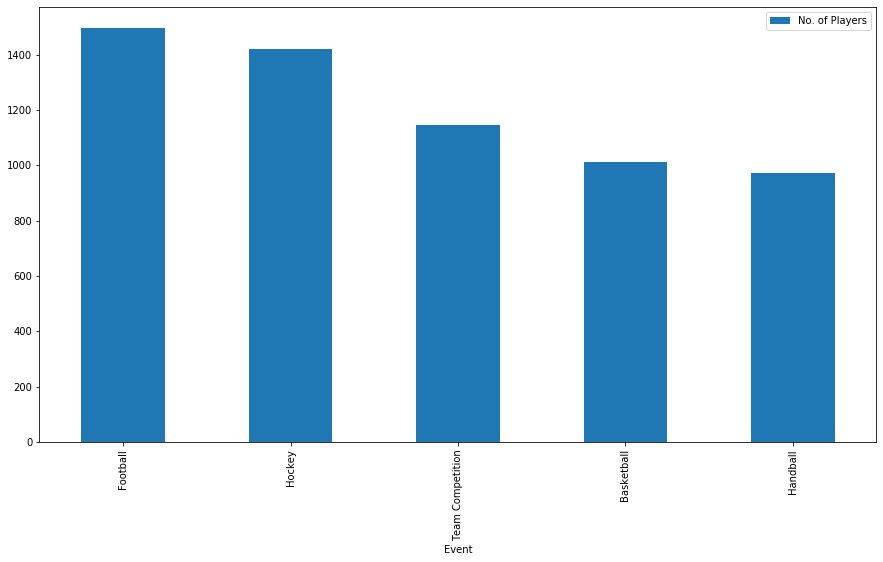

In [298]:
pd.DataFrame(data, columns = ['Event', 'No. of Players']).sort_values(by = 'No. of Players', ascending = False).head().plot(x = 'Event', y = 'No. of Players', kind = 'bar', figsize = (15, 8))

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [299]:
data = []
gp = processed_df.groupby(['Sport', 'Medal'])
for i in processed_df['Sport'].unique():
    Sport = gp.get_group((i, 'Gold'))
    data.append([i, (Sport['Gender'] == 'Women').sum()])

In [300]:
pd.DataFrame(data, columns = ['Sport', 'No. of Female Gold Medalists']).sort_values(by = 'No. of Female Gold Medalists', ascending = False).head()

,Sport,No. of Female Gold Medalists
0,Aquatics,589
1,Athletics,388
4,Gymnastics,268
17,Rowing,217
35,Volleyball,166


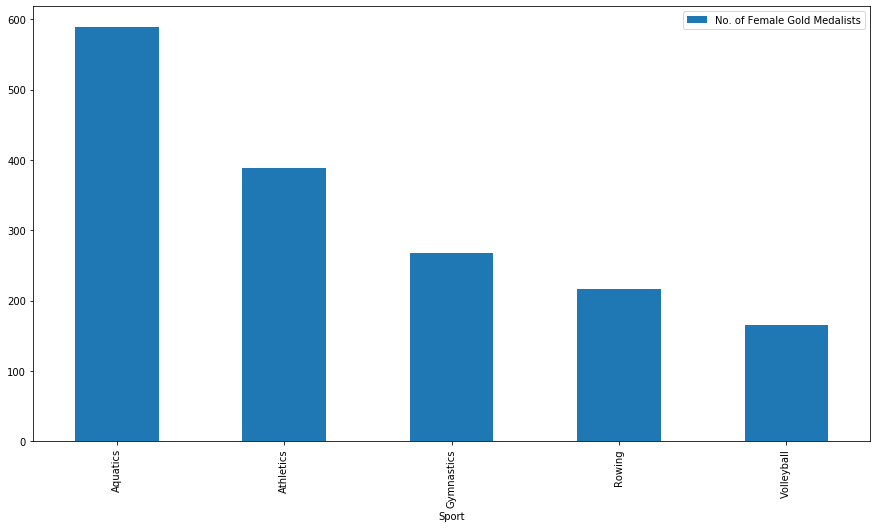

In [301]:
pd.DataFrame(data, columns = ['Sport', 'No. of Female Gold Medalists']).sort_values(by = 'No. of Female Gold Medalists', ascending = False).head().plot(x = 'Sport', y = 'No. of Female Gold Medalists', kind = 'bar', figsize = (15, 8))